In [59]:
import numpy as np
import scipy.stats as stats
from matplotlib.pyplot import plot
import pandas as pd 
import pylab
from scipy.stats import shapiro
import seaborn as sns

In [60]:
olcumler = np.array([17, 160, 234, 149, 145, 107, 197, 75, 201, 225, 211, 119, 
               157, 145, 127, 244, 163, 114, 145,  65, 112, 185, 202, 146,
               203, 224, 203, 114, 188, 156, 187, 154, 177, 95, 165, 50, 110, 
       216, 138, 151, 166, 135, 155, 84, 251, 173, 131, 207, 121, 120])

In [61]:
olcumler[1:10]
stats.describe(olcumler)

DescribeResult(nobs=50, minmax=(17, 251), mean=154.38, variance=2578.0363265306123, skewness=-0.32398897278694483, kurtosis=-0.05849823498415985)

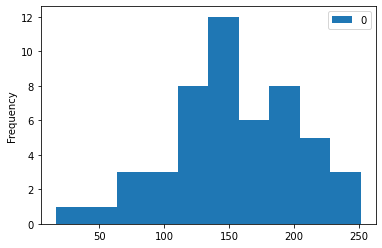

In [62]:
pd.DataFrame(olcumler).plot.hist()

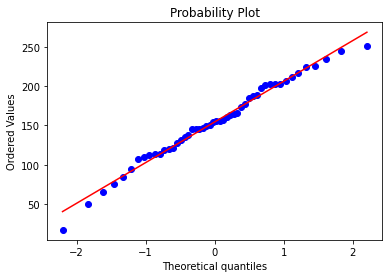

In [63]:
stats.probplot(olcumler, dist="norm", plot=pylab)
pylab.show()

In [64]:
import statsmodels.api as sm

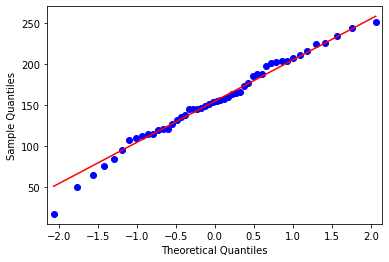

In [65]:
sm.qqplot(olcumler, line="s")
pylab.show()

In [66]:
stat, p = shapiro(olcumler)
print('Statistics=%3f, p=%.3f' % (stat, p))

Statistics=0.985310, p=0.785


In [67]:
alpha=0.05 ## tamamen bize kalmış biz belirliyoruz

if p > alpha:
    print('Örneklem Normal (Gaussian) Dağılımdan gelmektedir (Fail to Reject H0)')
else:
    print('Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)')

Örneklem Normal (Gaussian) Dağılımdan gelmektedir (Fail to Reject H0)


In [68]:
stats.ttest_1samp(olcumler, popmean=170) #popmean --> 


Ttest_1sampResult(statistic=-2.1753117985877966, pvalue=0.034460415195071446)

In [69]:
stats.t.ppf(q=0.025, df=len(olcumler)-1) #0.025lik alana denk gelen nokta

-2.0095752344892093

In [70]:
stats.t.cdf(x=-2.1753117985877966, df=len(olcumler)-1) * 2 # bizim noktamıza denk gelen alan

0.034460415195071446

In [71]:
#güven aralığı
import statsmodels.stats.api as sms
sms.DescrStatsW(olcumler).tconfint_mean()

(139.95008462736266, 168.80991537263733)

## bağımsız iki örneklem T testi - AB testi

In [72]:
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,25,21,18,24,26,33,26,27,28,19,25])
  
B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,32,33,33,33,31,32,33,26,32,33,29])

In [73]:
A_B = pd.concat([A,B], axis=1)
A_B.head()

,0,0
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [74]:
A_B.columns = ["A", "B"]
A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [75]:
GRUP_A = np.arange(len(A))
GRUP_A = pd.DataFrame(GRUP_A)
GRUP_A.head()

,0
0,0
1,1
2,2
3,3
4,4


In [76]:
GRUP_A[:] = "A"
A = pd.concat([A, GRUP_A], axis=1)
A.head()

,0,0
0,30,A
1,27,A
2,21,A
3,27,A
4,29,A


In [77]:
GRUP_B = np.arange(len(B))
GRUP_B = pd.DataFrame(GRUP_B)
GRUP_B
GRUP_B[:] = "B"
B = pd.concat([B, GRUP_B], axis=1)
B.head()

,0,0
0,37,B
1,39,B
2,31,B
3,31,B
4,34,B


In [80]:
AB = pd.concat([A,B])
AB.columns = ["GELİR", "GRUP"]
AB.head()

,GELİR,GRUP
0,30,A
1,27,A
2,21,A
3,27,A
4,29,A


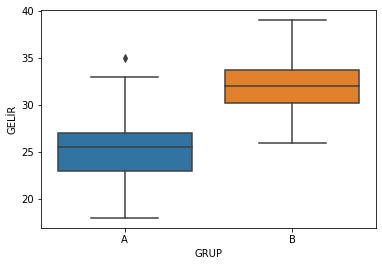

In [79]:
sns.boxplot(x="GRUP", y="GELİR", data=AB)

In [82]:
shapiro(A_B.A)

ShapiroResult(statistic=0.9789243936538696, pvalue=0.7962848544120789)

In [83]:
shapiro(A_B.B)

ShapiroResult(statistic=0.9561261534690857, pvalue=0.24584393203258514)

In [85]:
import scipy
scipy.stats.ks_2samp(A_B.B, A_B.A)

KstestResult(statistic=0.7, pvalue=2.5000118318420276e-07)

In [87]:
stats.levene(A_B.B, A_B.A)

LeveneResult(statistic=1.1101802757158004, pvalue=0.2964124900636569)

In [88]:
stats.ttest_ind(A_B["A"], A_B["B"], equal_var=True)

Ttest_indResult(statistic=-7.028690967745927, pvalue=2.6233215605475075e-09)

## bağımlı olarak

In [90]:
oncesi = pd.DataFrame([123,119,119,116,123,123,121,120,117,118,121,121,123,119,121,118,124,121,125,115,115,119,118,121,117,
                       117,120,120,121,117,118,117,123,118,124,121,115,118,125,115])
sonrasi = pd.DataFrame([118,127,122,132,129,123,129,132,128,130,128,138,140,130,134,134,124,140,134,129,129,138,134,124,
                        122,126,133,127,130,130,130,132,117,130,125,129,133,120,127,123])

In [91]:
BIRLIKTE = pd.concat([oncesi, sonrasi], axis=1)
BIRLIKTE.columns = ["oncesi", "sonrasi"]
BIRLIKTE.head()

,oncesi,sonrasi
0,123,118
1,119,127
2,119,122
3,116,132
4,123,129


In [92]:
GRUP_ONCESI = np.arange(len(oncesi))
GRUP_ONCESI = pd.DataFrame(GRUP_ONCESI)
GRUP_ONCESI[:] = "ONCESI"
A = pd.concat([oncesi, GRUP_ONCESI], axis = 1)
GRUP_SONRASI = np.arange(len(sonrasi))
GRUP_SONRASI = pd.DataFrame(GRUP_SONRASI)
GRUP_SONRASI[:] = "SONRASI"
B = pd.concat([sonrasi, GRUP_SONRASI], axis = 1)

In [98]:
AB = pd.concat([A, B])
AB.columns=["SKOR", "ONCESİ_SONRASI"]
AB.head()

,SKOR,ONCESİ_SONRASI
0,123,ONCESI
1,119,ONCESI
2,119,ONCESI
3,116,ONCESI
4,123,ONCESI


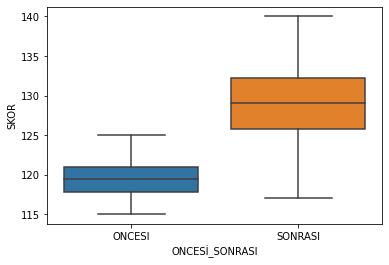

In [99]:
sns.boxplot(x= "ONCESİ_SONRASI", y= "SKOR", data=AB)

In [101]:
stat, p = stats.levene(BIRLIKTE.oncesi, BIRLIKTE.sonrasi)

In [102]:
p

0.0050844511807370246

In [104]:
stats.ttest_rel(BIRLIKTE.oncesi, BIRLIKTE.sonrasi)

Ttest_relResult(statistic=-9.281533480429937, pvalue=2.0235251764440722e-11)

####

In [106]:
A = pd.DataFrame([28,33,30,29,28,29,27,31,30,32,28,33,25,29,27,31,31,30,31,34,30,32,31,34,28,32,31,28,33,29])
B = pd.DataFrame([31,32,30,30,33,32,34,27,36,30,31,30,38,29,30,34,34,31,35,35,33,30,28,29,26,37,31,28,34,33])
C = pd.DataFrame([40,33,38,41,42,43,38,35,39,39,36,34,35,40,38,36,39,36,33,35,38,35,40,40,39,38,38,43,40,42])
dfs = [A, B, C]

In [109]:
ABC = pd.concat(dfs, axis=1)
ABC.columns = ["GRUP_A", "GRUP_B", "GRUP_C"]
ABC.describe().T

,count,mean,std,min,25%,50%,75%,max
GRUP_A,30.0,30.133333,2.224214,25.0,28.25,30.0,31.75,34.0
GRUP_B,30.0,31.700000,2.937862,26.0,30.00,31.0,34.00,38.0
GRUP_C,30.0,38.100000,2.808239,33.0,36.00,38.0,40.00,43.0


In [110]:
# normal dağılımdan gelip gelmediği kontrol ediliyor
stats.shapiro(ABC["GRUP_A"])

ShapiroResult(statistic=0.969743013381958, pvalue=0.5321676135063171)

In [111]:
stats.shapiro(ABC["GRUP_B"])

ShapiroResult(statistic=0.9789855480194092, pvalue=0.7979815602302551)

In [112]:
stats.shapiro(ABC["GRUP_C"])

ShapiroResult(statistic=0.9579198360443115, pvalue=0.27381524443626404)

In [113]:
#varyanslar eşit mi değil mi kontrol ediliyor
# varyanslar eşit çıktı.

stats.levene(ABC["GRUP_A"], ABC["GRUP_B"], ABC["GRUP_C"])

LeveneResult(statistic=1.0267403645055275, pvalue=0.36247110117417064)

In [115]:
## bu gruplar arasında en az biri farklı mı. ölçütlerde grupların etkisi var mı. grupların ortalamaları farklı mı bakılıyor

from scipy.stats import f_oneway
f_oneway(ABC["GRUP_A"], ABC["GRUP_B"], ABC["GRUP_C"])

F_onewayResult(statistic=74.69278140730431, pvalue=1.3079050746811477e-19)

In [116]:
## Import the packages
import numpy as np
from scipy import stats


## Define 2 random distributions
#Sample Size
N = 10
#Gaussian distributed data with mean = 2 and var = 1
a = np.random.randn(N) + 2
#Gaussian distributed data with with mean = 0 and var = 1
b = np.random.randn(N)


## Calculate the Standard Deviation
#Calculate the variance to get the standard deviation

#For unbiased max likelihood estimate we have to divide the var by N-1, and therefore the parameter ddof = 1
var_a = a.var(ddof=1)
var_b = b.var(ddof=1)

#std deviation
s = np.sqrt((var_a + var_b)/2)
s



## Calculate the t-statistics
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))



## Compare with the critical t-value
#Degrees of freedom
df = 2*N - 2

#p-value after comparison with the t 
p = 1 - stats.t.cdf(t,df=df)


print("t = " + str(t))
print("p = " + str(2*p))
### You can see that after comparing the t statistic with the critical t value (computed internally) we get a good p value of 0.0005 and thus we reject the null hypothesis and thus it proves that the mean of the two distributions are different and statistically significant.


## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(p2))

t = 2.368896682834955
p = 0.029230977255946256
t = 2.368896682834955
p = 0.02923097725594613
